In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from metric_utils import ConfusionMatrixMetrics

letter_labels = [f"({letter})" for letter in "abcdefghijklmnopqrstuvwxyz"]

plt.style.use("style.mplstyle")

In [2]:
df = pd.read_parquet("data/parallel_nsa_cloudy_predictions.parquet")
df.head()

cloud_phase cnn_dropout  cnn rf_balanced  \
time                height                                            
2021-01-01 00:57:00 0.16           ice         ice  ice      liquid   
                    0.19           ice         ice  ice      liquid   
                    0.22           ice         ice  ice         ice   
                    0.25           ice         ice  ice      liquid   
2021-01-01 00:57:30 0.16           ice         ice  ice         ice   

                           rf_imbalanced mlp_balanced mlp_imbalanced  \
time                height                                             
2021-01-01 00:57:00 0.16             ice       liquid            ice   
                    0.19             ice          ice            ice   
                    0.22             ice          ice            ice   
                    0.25             ice          ice            ice   
2021-01-01 00:57:30 0.16             ice       liquid            ice   

                            cnn_dropout_confidence  cnn_confidence  \
time                height                                           
2021-01-01 00:57:00 0.16                  0.864284        0.793064   
                    0.19                  0.920299        0.910763   
                    0.22                  0.859795        0.926132   
                    0.25                  0.812101        0.895370   
2021-01-01 00:57:30 0.16                  0.909938        0.861275   

                            rf_balanced_confidence  ...  mlp_imbalanced_mpl  \
time                height                          ...                       
2021-01-01 00:57:00 0.16                      0.55  ...              liquid   
                    0.19                      0.52  ...                 ice   
                    0.22                      0.55  ...                 ice   
                    0.25                      0.59  ...              liquid   
2021-01-01 00:57:30 0.16                      0.51  ...              liquid   

                            mlp_imbalanced_mpl_b  mlp_imbalanced_mpl_ldr  \
time                height                                                 
2021-01-01 00:57:00 0.16                  liquid                  liquid   
                    0.19                     ice                     ice   
                    0.22                     ice                     ice   
                    0.25                     ice                     ice   
2021-01-01 00:57:30 0.16                     ice                  liquid   

                           mlp_imbalanced_mwr mlp_imbalanced_rad  \
time                height                                         
2021-01-01 00:57:00 0.16               liquid                ice   
                    0.19               liquid                ice   
                    0.22               liquid                ice   
                    0.25               liquid                ice   
2021-01-01 00:57:30 0.16               liquid                ice   

                           mlp_imbalanced_rad_ldr mlp_imbalanced_rad_mdv  \
time                height                                                 
2021-01-01 00:57:00 0.16                      ice                    ice   
                    0.19                      ice                    ice   
                    0.22                      ice                    ice   
                    0.25                      ice                    ice   
2021-01-01 00:57:30 0.16                      ice                    ice   

                           mlp_imbalanced_rad_ref mlp_imbalanced_rad_spec  \
time                height                                                  
2021-01-01 00:57:00 0.16                      ice                     ice   
                    0.19                      ice                     ice   
                    0.22                      ice                     ice   
                    0.25                      ice  

In [3]:
cnn_metrics = ConfusionMatrixMetrics(pred=df["cnn"], truth=df["cloud_phase"])
cnn_dropout_metrics = ConfusionMatrixMetrics(pred=df["cnn_dropout"], truth=df["cloud_phase"])
rf_balanced_metrics = ConfusionMatrixMetrics(pred=df["rf_balanced"], truth=df["cloud_phase"])
mlp_balanced_metrics = ConfusionMatrixMetrics(pred=df["mlp_balanced"], truth=df["cloud_phase"])
rf_imbalanced_metrics = ConfusionMatrixMetrics(pred=df["rf_imbalanced"], truth=df["cloud_phase"])
mlp_imbalanced_metrics = ConfusionMatrixMetrics(pred=df["mlp_imbalanced"], truth=df["cloud_phase"])

In [4]:
metrics = pd.DataFrame({
    "cnn": cnn_metrics.scores(),
    "mlp": mlp_balanced_metrics.scores(),
    "rf": rf_balanced_metrics.scores(),
    "cnn_dropout": cnn_dropout_metrics.scores(),
    "mlp_imbalanced": mlp_imbalanced_metrics.scores(),
    "rf_imbalanced": rf_imbalanced_metrics.scores(),
}).T[["acc", "precision", "recall", "f1", "iou"]]
metrics["acc"] *= 100
metrics

,acc,precision,recall,f1,iou
cnn,95.700364,0.889606,0.894445,0.891245,0.810592
mlp,84.645356,0.756114,0.898009,0.808210,0.695153
rf,85.767076,0.774136,0.902663,0.822590,0.714736
cnn_dropout,88.395974,0.868592,0.681049,0.749704,0.622493
mlp_imbalanced,92.053474,0.869898,0.851402,0.860148,0.765152
rf_imbalanced,92.310454,0.883614,0.867111,0.875078,0.787507


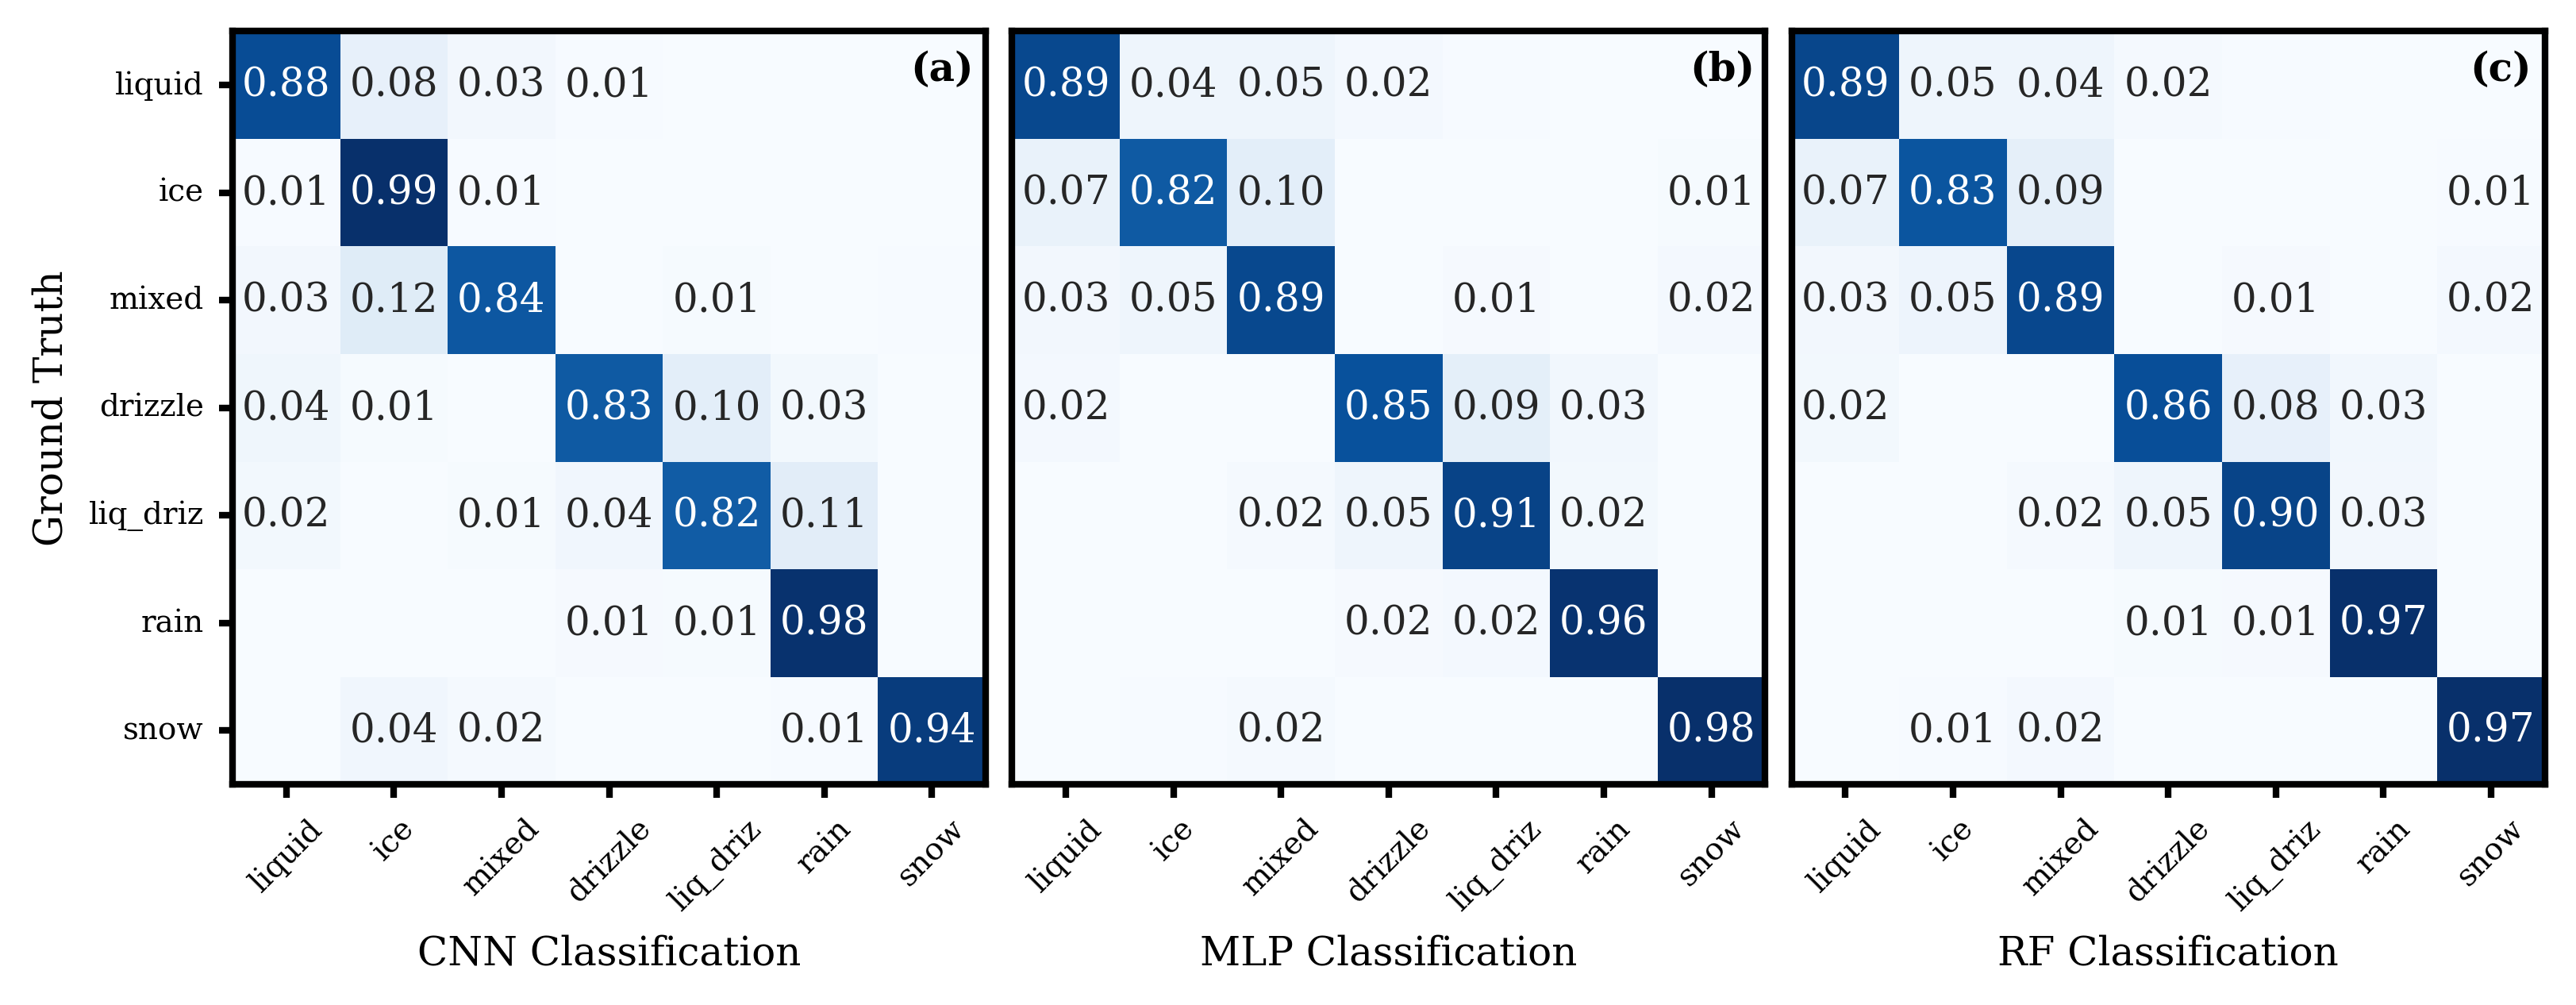

In [5]:
fig, axs = plt.subplots(figsize=(8, 6), ncols=3, layout="constrained")

cnn_metrics.plot(axs[0], norm="index", pred_label="CNN Classification")
mlp_balanced_metrics.plot(axs[1], norm="index", pred_label="MLP Classification")
rf_balanced_metrics.plot(axs[2], norm="index", pred_label="RF Classification")

for i, ax in enumerate(axs.flat):
    if i != 0:
        ax.set_ylabel("")
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.9,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )


axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")

fig.savefig("figures/new_nsa_confusion.png")
fig.show()

In [6]:
# ANX Results
anx_df = pd.read_parquet("data/parallel_anx_cloudy_predictions.parquet")

anx_cnn_metrics = ConfusionMatrixMetrics(pred=anx_df["cnn"], truth=anx_df["cloud_phase"])
anx_cnn_dropout_metrics = ConfusionMatrixMetrics(pred=anx_df["cnn_dropout"], truth=anx_df["cloud_phase"])
anx_rf_balanced_metrics = ConfusionMatrixMetrics(pred=anx_df["rf_balanced"], truth=anx_df["cloud_phase"])
anx_mlp_balanced_metrics = ConfusionMatrixMetrics(pred=anx_df["mlp_balanced"], truth=anx_df["cloud_phase"])
anx_rf_imbalanced_metrics = ConfusionMatrixMetrics(pred=anx_df["rf_imbalanced"], truth=anx_df["cloud_phase"])
anx_mlp_imbalanced_metrics = ConfusionMatrixMetrics(pred=anx_df["mlp_imbalanced"], truth=anx_df["cloud_phase"])

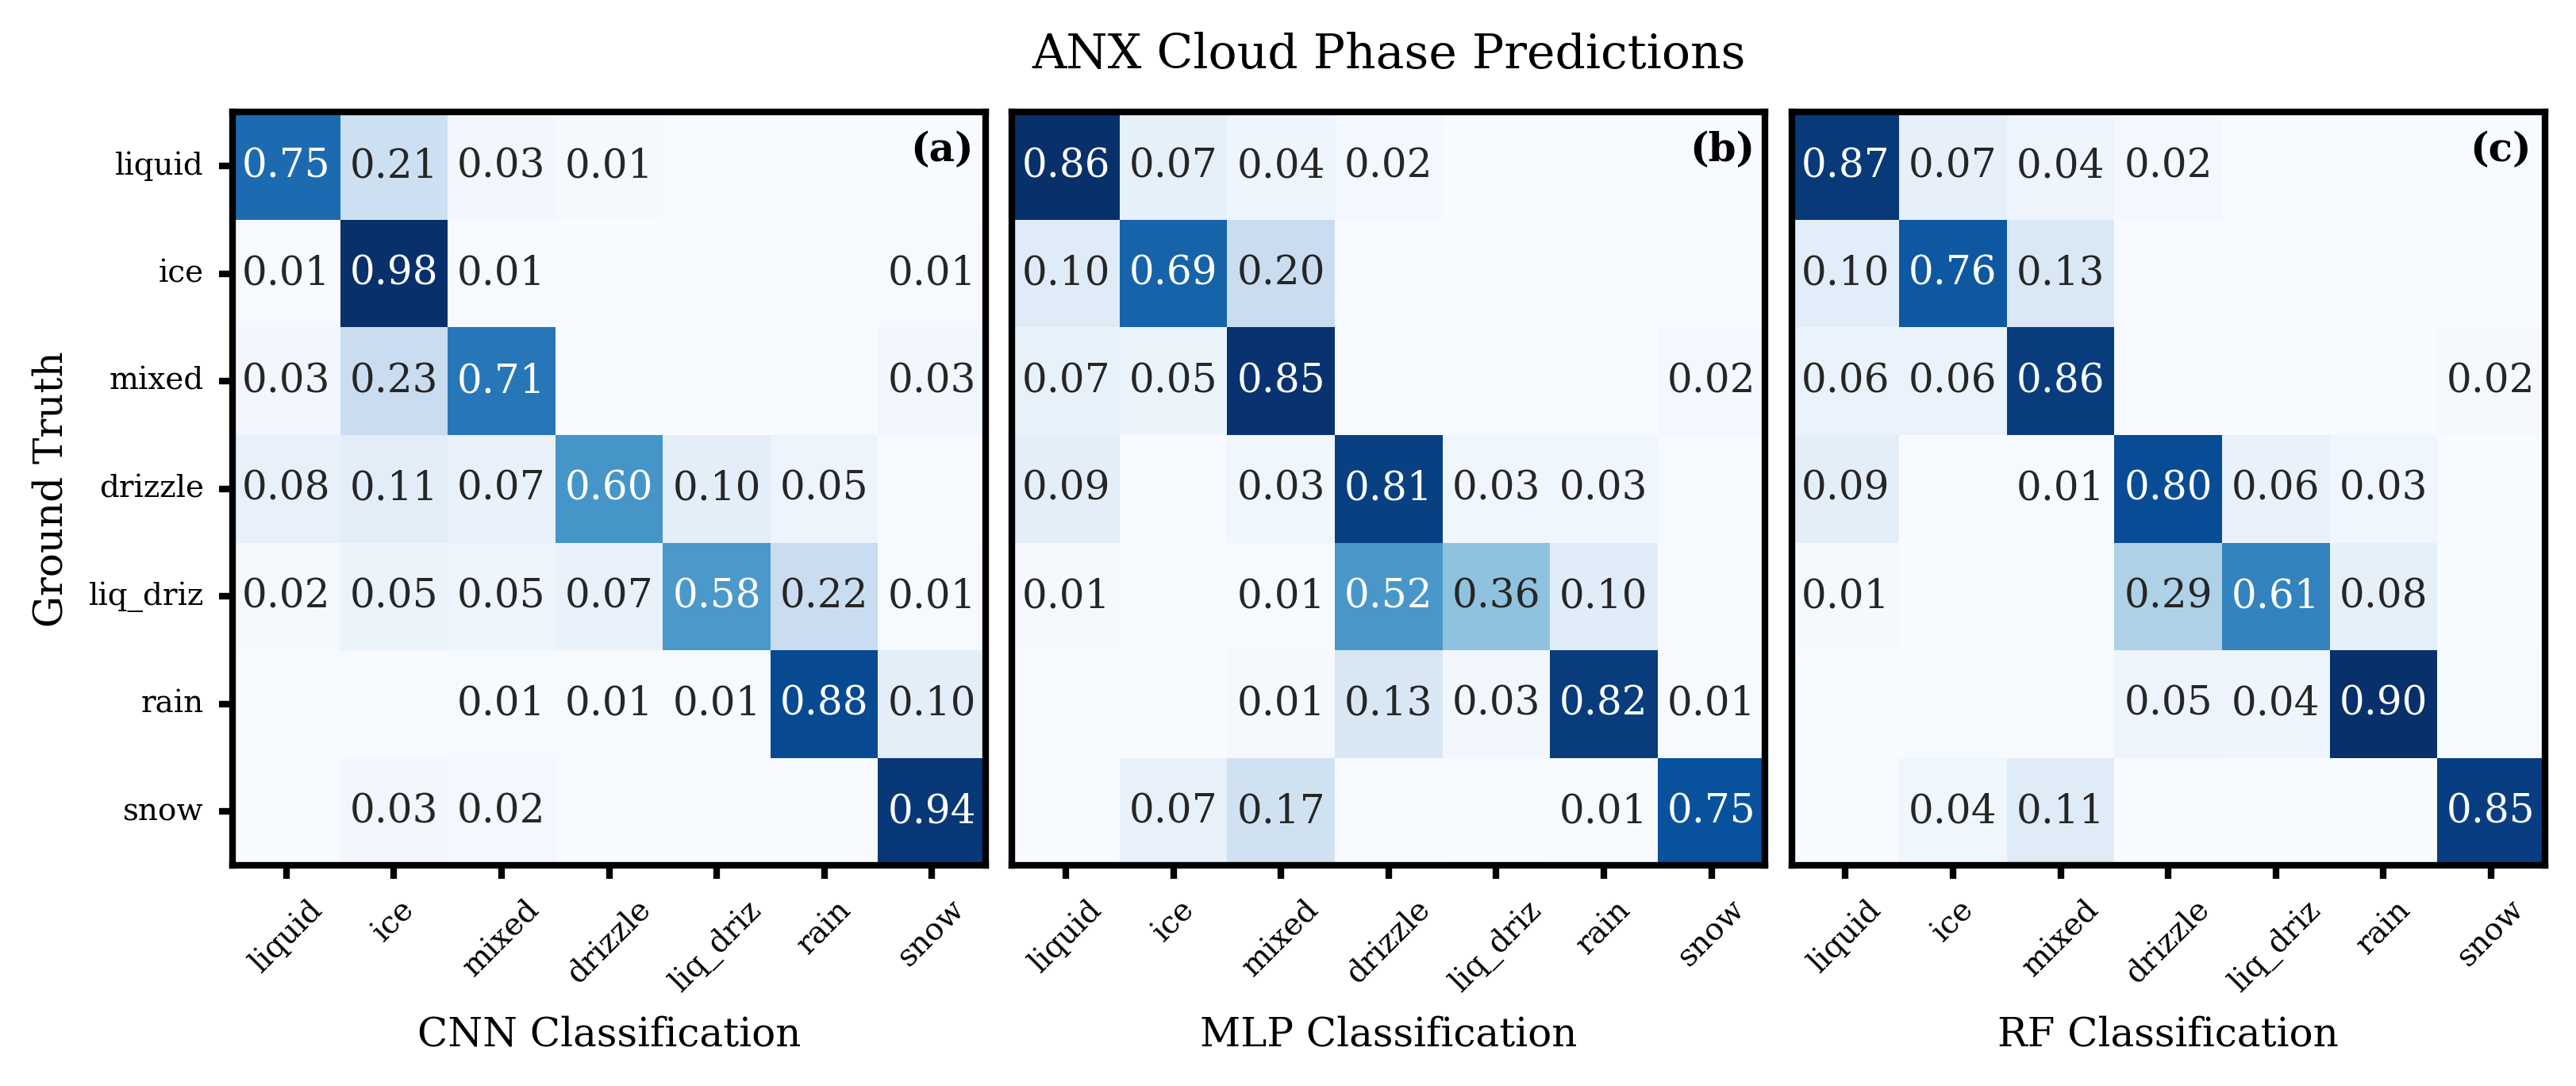

In [7]:
fig, axs = plt.subplots(
    figsize=(8, 6),
    ncols=3,
    layout="constrained"
)

anx_cnn_metrics.plot(axs[0], norm="index", pred_label="CNN Classification")
anx_mlp_balanced_metrics.plot(axs[1], norm="index", pred_label="MLP Classification")
anx_rf_balanced_metrics.plot(axs[2], norm="index", pred_label="RF Classification")

for i, ax in enumerate(axs.flat):
    if i != 0:
        ax.set_ylabel("")
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.9,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )

axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")
axs[1].set_title("ANX Cloud Phase Predictions", pad=10)

fig.savefig("figures/new_anx_confusion.png")

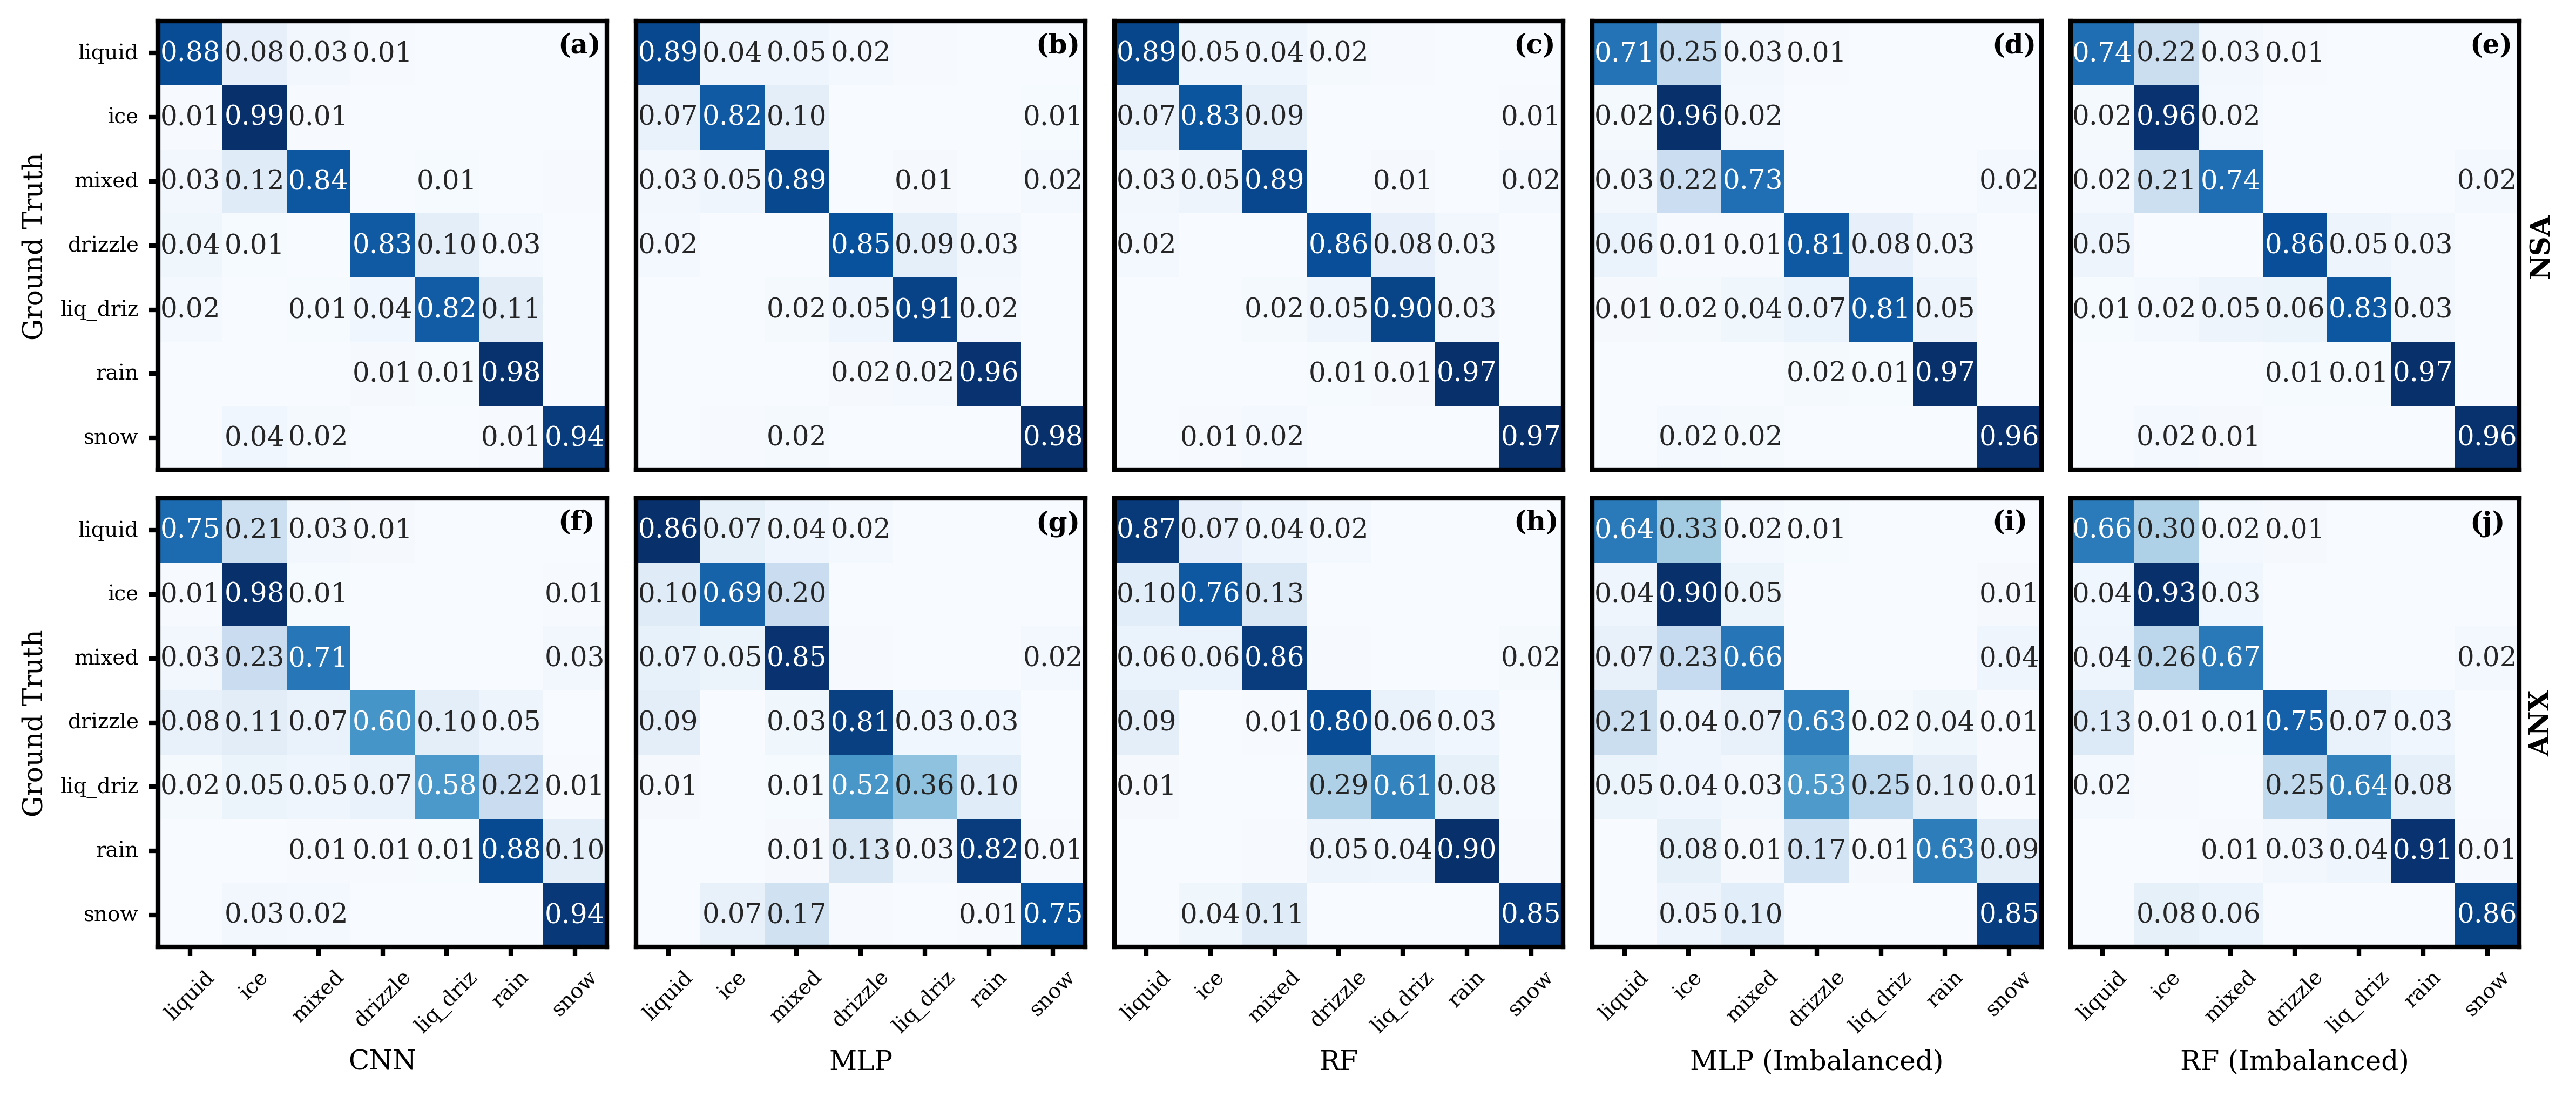

In [8]:
# All together

fig, axs = plt.subplots(
    figsize=(12, 6),
    nrows=2,
    ncols=5,
    # sharey=True,
    layout="tight",
)

# nsa
# make_heatmap(axs[0, 0], data=cnn, label="CNN")
# make_heatmap(axs[0, 1], data=mlp_balance, label="MLP")
# make_heatmap(axs[0, 2], data=rf_balance, label="RF")
# make_heatmap(axs[0, 3], data=mlp_imbalance, label="Imbalanced MLP")
# make_heatmap(axs[0, 4], data=rf_imbalance, label="Imbalanced RF")
cnn_metrics.plot(axs[0, 0], norm="index", pred_label="CNN")
mlp_balanced_metrics.plot(axs[0, 1], norm="index", pred_label="MLP")
rf_balanced_metrics.plot(axs[0, 2], norm="index", pred_label="RF")
mlp_imbalanced_metrics.plot(axs[0, 3], norm="index", pred_label="MLP (Imbalanced)")
rf_imbalanced_metrics.plot(axs[0, 4], norm="index", pred_label="RF (Imbalanced)")

# anx
anx_cnn_metrics.plot(axs[1, 0], norm="index", pred_label="CNN")
anx_mlp_balanced_metrics.plot(axs[1, 1], norm="index", pred_label="MLP")
anx_rf_balanced_metrics.plot(axs[1, 2], norm="index", pred_label="RF")
anx_mlp_imbalanced_metrics.plot(axs[1, 3], norm="index", pred_label="MLP (Imbalanced)")
anx_rf_imbalanced_metrics.plot(axs[1, 4], norm="index", pred_label="RF (Imbalanced)")

# make_heatmap(axs[1, 0], data=anx_cnn, label="CNN")
# make_heatmap(axs[1, 1], data=anx_mlp_balance, label="MLP")
# make_heatmap(axs[1, 2], data=anx_rf_balance, label="RF")
# make_heatmap(axs[1, 3], data=anx_mlp_imbalance, label="Imbalanced MLP")
# make_heatmap(axs[1, 4], data=anx_rf_imbalance, label="Imbalanced RF")

for i, ax in enumerate(axs.flat):
    ax.xaxis.set_tick_params(rotation=45)
    ax.text(
        x=0.89,
        y=0.975,
        transform=ax.transAxes,
        s=letter_labels[i],
        verticalalignment="top",
        horizontalalignment="left",
        fontweight="bold",
        fontsize=9,
    )

    if i in [0, 5]:
        ax.set_ylabel("Ground Truth")
    else:
        ax.set_ylabel("")
        ax.set_yticks([])

    if i in [0, 1, 2, 3, 4]:
        ax.xaxis.set_ticks([])
        ax.set_xlabel("")


axs[0, 4].text(
    x=1.05,
    y=0.5,
    transform=axs[0, 4].transAxes,
    s="NSA",
    verticalalignment="center",
    horizontalalignment="center",
    fontweight="bold",
    # fontsize=9,
    rotation=90,
)
axs[1, 4].text(
    x=1.05,
    y=0.5,
    transform=axs[1, 4].transAxes,
    s="ANX",
    verticalalignment="center",
    horizontalalignment="center",
    fontweight="bold",
    # fontsize=9,
    rotation=90,
)

fig.savefig("figures/new_confusion.png")
fig.show()